# RBF neural net

In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import torch

In [141]:
# cpg model parameters
MI = 0.02
b1 = 0.01
b2 = 0.01
w11 = 1.4
w12 = 0.18 + MI
w21 = -0.18 - MI
w22 = 1.4
o1 = 0.01
o2 = 0.01
# W = [[w11,w21],[w12,w22]]
# O = [o1, o2]

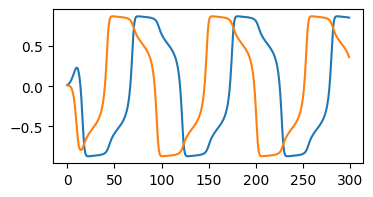

In [142]:
# cpg running
cpg_out = []
for i in range(300):
    o1 = tanh(o1*w11 + o2*w12 )
    o2 = tanh(o2*w22 + o1*w21 )
    cpg_out.append([o1, o2])
cpg_out = np.array(cpg_out)
plt.figure(figsize=(4,2))
plt.plot(cpg_out[:,0])
plt.plot(cpg_out[:,1])
# cpg_out

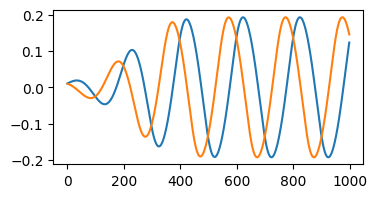

In [143]:
# SO2 oscillator from paper
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
for i in range(1000):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    cpg_out.append([o1, o2])
cpg_out = np.array(cpg_out)
plt.figure(figsize=(4,2))
plt.plot(cpg_out[:,0])
plt.plot(cpg_out[:,1])
# cpg_out

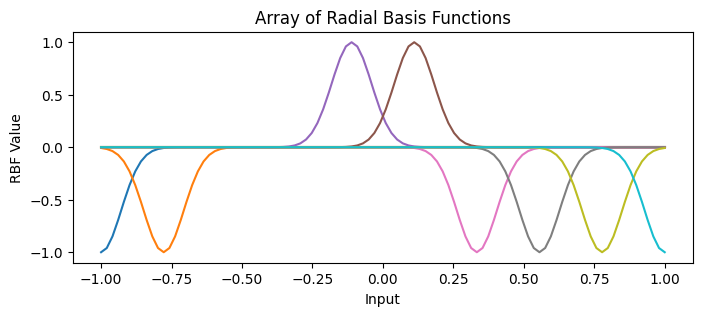

In [144]:
import numpy as np
import matplotlib.pyplot as plt

def generate_rbf_array(input_range, num_basis, centers, widths, weights):
    """
    Generates an array of Radial Basis Functions (RBFs) over a given input range.

    Args:
        input_range (tuple): Range of the input values (e.g., (0, 1)).
        num_basis (int): Number of basis functions.
        centers (ndarray): Array of centers for the basis functions.
        widths (ndarray): Array of widths for the basis functions.

    Returns:
        ndarray: Array of RBFs evaluated over the input range.
    """
    x = np.linspace(input_range[0], input_range[1], num=100)
    rbf_array = np.zeros((num_basis, len(x)))

    for i in range(num_basis):
        rbf_array[i] = weights[i]*np.exp(-widths[i] * (x - centers[i]) ** 2)

    return rbf_array

# Example usage
input_range = (-1, 1)
num_basis = 10
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
widths = np.ones(num_basis) * 100
weights = np.random.randint(input_range[0], input_range[1]+1, 10,)

rbf_array = generate_rbf_array(input_range, num_basis, centers, widths, weights)

# Plotting the RBFs
plt.figure(figsize=(8, 3))
for i in range(num_basis):
    plt.plot(np.linspace(input_range[0], input_range[1], num=100), rbf_array[i], label=f'RBF {i+1}')
plt.xlabel('Input')
plt.ylabel('RBF Value')
plt.title('Array of Radial Basis Functions')
# plt.legend()
plt.show()

In [145]:
weights

array([-1, -1,  0,  0,  1,  1, -1, -1, -1, -1])

In [146]:
# cycle checker
T_step = 0
counter = 0
o1_p = 0
# for i in range(10000):
#     o1 = math.tanh(o1*w11 + o2*w12 )
#     o2 = math.tanh(o2*w22 + o1*w21 )
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
cpg_out = []
# Rbf network
input_range = (-1, 1)
num_basis = 10
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
widths = np.ones(num_basis) * 100
x = np.linspace(input_range[0], input_range[1], num=100)
# weights = np.arange(input_range[0], input_range[1], 0.1)
rbf_array = np.zeros((num_basis, len(x)))
T_step = 201
phase = 0 # phase of oscillator
phase_array = []
for step in range(376):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))

for step in range(600):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    # phase = counter/T_step
    # print(t)
    # phase_array.append(phase)
    # cpg_out.append(o1)
    # counter += 1
    if o1_p < 0 and o1 > 0:
        T_step = counter
        print('T_step', T_step)
        print(T_step)
        print(o1_p, o1)
        print('cpg_out: ', len(cpg_out))
        print('phase_array: ', len(phase_array))
        # print('x: ', x)
        # RBF function
        rbf_array = np.zeros((num_basis, T_step))
        print('rbf_array: ', rbf_array.shape)
        for i in range(num_basis):
            rbf_array[i] = np.exp(-widths[i] * (phase_array - centers[i]) ** 2)
        counter = 0
        # Plotting the RBFs
        # plt.figure(figsize=(8, 3))
        # for i in range(num_basis):
        #     plt.plot(np.linspace(input_range[0], input_range[1], num=len(phase_array)), rbf_array[i], label=f'RBF {i+1}')
        # plt.plot(phase_array, np.sum(rbf_array, axis=0))
        # plt.plot(phase_array, cpg_out)
        # plt.xlabel('Input')
        # plt.ylabel('RBF Value')
        # plt.title('Array of Radial Basis Functions')
        # # plt.legend()
        # plt.show()
        cpg_out = []
        phase_array = []
    o1_p = o1


T_step 0
0
-0.002037866758872288 0.004020559159657686
cpg_out:  0
phase_array:  0
rbf_array:  (10, 0)
T_step 0
0
-0.004769327652237066 0.0012807960533901212
cpg_out:  0
phase_array:  0
rbf_array:  (10, 0)


o1, o2:  0.010411888659894014 0.009764390139326064
o1, o2:  0.01082017021613351 0.00951361222728827
o1, o2:  0.011224326102836102 0.00924765313274609
o1, o2:  0.011623832459260632 0.008966516029487436
o1, o2:  0.012018160623900665 0.00867022070313843
o1, o2:  0.012406777643953133 0.008358803847192951
o1, o2:  0.012789146799752842 0.008032319347709338
o1, o2:  0.01316472814372663 0.007690838556213438
o1, o2:  0.0135329790533844 0.007334450550337976
o1, o2:  0.01389335479782875 0.006963262381717988
o1, o2:  0.014245309117230534 0.006577399310650754
o1, o2:  0.014588294814684486 0.006177005027016458
o1, o2:  0.01492176435982755 0.005762241856942833
o1, o2:  0.015245170503572764 0.005333290954683206
o1, o2:  0.015557966903283793 0.004890352479163
o1, o2:  0.015859608757689554 0.004433645754634932
o1, o2:  0.01614955345081524 0.003963409414867971
o1, o2:  0.016427261204185334 0.0034799015302798817
o1, o2:  0.01669219573653629 0.0029833997174080404
o1, o2:  0.01694382493026145 0.002474201230

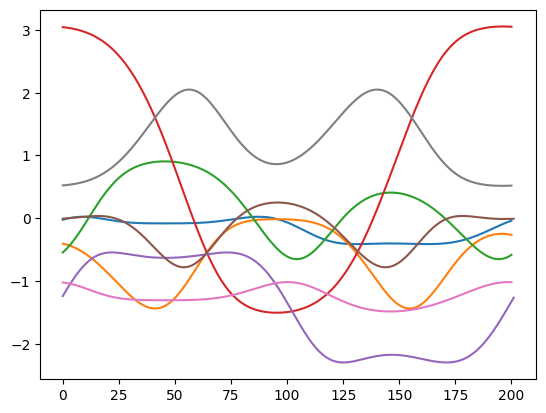

In [147]:
# RBF network re-produce paper
T_step = 0
counter = 0
o1_p = 0
# for i in range(10000):
#     o1 = math.tanh(o1*w11 + o2*w12 )
#     o2 = math.tanh(o2*w22 + o1*w21 )
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
cpg_out = []
# Rbf network
input_range = (-1, 1)
num_basis = 20
num_output = 2
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
# widths = np.ones(num_basis) * 100
variance = 1/0.04
x = np.linspace(input_range[0], input_range[1], num=100)
# weights = np.arange(input_range[0], input_range[1], 0.1)
# weights = np.random.randint(input_range[0], input_range[1]+1, num_basis,)
weights = np.random.randn(num_output, num_basis)

# rbf_array = np.zeros((num_basis, len(x)))
rbf_array = []
T_step = 201
phase = 0 # phase of oscillator
phase_array = []
for step in range(376):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    print('o1, o2: ', o1, o2)

for step in range(1000):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    cpg_out = [[o1], [o2]]
    # print('o1', o1)
    rbf_array.append(np.sum(weights*np.exp(-variance*(cpg_out - centers) ** 2), axis=1))
    
    if o1_p < 0 and o1 > 0:
        counter = 0
        plt.plot(rbf_array)
        rbf_array = []
        weights = np.random.randn(num_output, num_basis)
        # print('weights: ', weights)
    o1_p = o1


In [148]:
from rbf_neural_net import RBFNet

In [149]:
model = RBFNet(1)

TypeError: RBFNet.__init__() missing 1 required positional argument: 'num_output'

In [ ]:
output = []
for i in range(300):
    output.append(model.forward())
    # print('output: ', output)
plt.plot(output)

### Test RBF GPU version

In [78]:
POPSIZE = 2
omega = 0.01*np.pi
o1 = torch.Tensor.repeat(torch.Tensor([0.00]), POPSIZE).unsqueeze(1)
o2 = torch.Tensor.repeat(torch.Tensor([0.18]), POPSIZE).unsqueeze(1)
O = torch.Tensor([[0.01, 0.18]]).expand(POPSIZE, 2)
# Rbf network
input_range = (-1, 1)
num_basis = 10
num_output = 3
centers = torch.linspace(input_range[0], input_range[1], num_basis)
variance = 1/0.04
weights = torch.randn(POPSIZE, num_basis, num_output,)
rbf_array = []
W = torch.Tensor([[ cos(omega) ,  -sin(omega)], 
                  [ sin(omega) ,  cos(omega)]])

tensor([[0.4396, 0.0187, 0.4821],
        [0.5357, 0.2870, 0.2631]])


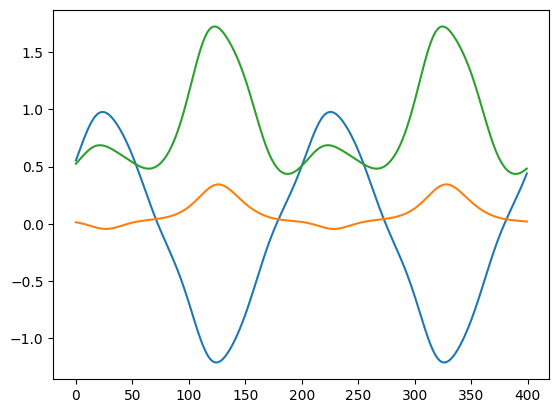

In [80]:
output = []
with torch.no_grad():
    for i in range(400):
        # o1 = torch.tanh(1.01*( o1p*cos(omega) + o2p*sin(omega)))
        # o2 = torch.tanh(1.01*(-o1p*sin(omega) + o2p*cos(omega)))
        O = torch.tanh(1.01*torch.matmul(O, W))
        # print('o1', o1)
        # posto1 = torch.sum(weights[0]*np.exp(variance*(o1 - centers)), dim=1)
        # posto2 = torch.sum(weights[1]*np.exp(variance*(o2 - centers)), dim=1)
        a = torch.exp(-variance*torch.sum((O.reshape(POPSIZE, 2, 1).
                                           expand(POPSIZE,2,num_basis) - centers) ** 2, dim=1))
        post = torch.matmul(a, weights)[:, 0]
        
        # cpg_out = torch.stack([posto1,posto2])
        output.append(post.tolist())
        o1p = o1
        o2p = o2
    print(post)
plt.plot(np.array(output)[:,0,0])
plt.plot(np.array(output)[:,0,1])
plt.plot(np.array(output)[:,0,2])
# plt.plot(output[:,1:2])

In [67]:
a = torch.exp(-variance*torch.sum((O.reshape(POPSIZE, 2, 1).expand(POPSIZE,2,num_basis) - centers) ** 2, dim=1))
a

tensor([[3.8304e-27, 1.3447e-17, 3.3833e-10, 6.1008e-05, 7.8846e-02, 7.3030e-01,
         4.8480e-02, 2.3065e-05, 7.8649e-11, 1.9220e-18],
        [3.8304e-27, 1.3447e-17, 3.3833e-10, 6.1008e-05, 7.8846e-02, 7.3030e-01,
         4.8480e-02, 2.3065e-05, 7.8649e-11, 1.9220e-18]])

In [68]:
weights = torch.randn(POPSIZE, num_basis, num_output,)
weights

tensor([[[-0.2957, -1.3798,  0.2960],
         [ 1.7896,  0.1609, -0.4691],
         [ 0.5343,  0.0741,  0.7814],
         [ 0.8328, -0.8167, -1.3501],
         [-1.0589,  1.6796, -1.4094],
         [-1.2295, -0.7548,  0.8730],
         [ 1.7635,  1.0422,  0.2382],
         [-0.5680, -1.4055,  0.7501],
         [-1.5952, -1.4221,  2.4424],
         [ 0.6132, -0.3085, -1.8990]],

        [[-0.5321, -0.7746, -0.3253],
         [ 0.1124, -1.5939,  0.3691],
         [ 0.3244, -0.9982,  0.6867],
         [-0.1620, -0.9603,  0.7707],
         [ 0.5159,  0.2357,  0.5751],
         [-0.2927,  0.8869, -0.8366],
         [-1.6743,  0.2848,  0.5880],
         [-1.0717, -0.9117, -1.6018],
         [-1.9700, -0.6663,  0.2886],
         [-1.8080,  0.1876,  1.3601]]])

In [74]:
torch.matmul(a, weights)[:, 0]

tensor([[-0.8959, -0.3684,  0.5379],
        [-0.2543,  0.6800, -0.5371]])

In [72]:
torch.einsum('ij, klm -> ik', a, weights)

tensor([[-1.7936, -7.7139],
        [-1.7936, -7.7139]])

In [ ]:
# torch.einsum('bp,bqr->bpqr', v, M) # batch-wise operation v.shape=(b,p) M.shape=(b,q,r)
# torch.einsum('p,qr->pqr', v, M)    # cross-batch operation

torch.einsum('p,qr->pqr', -centers, O)    # cross-batch operation


In [ ]:
from rbf_neural_net import RBFNet
model = RBFNet(2, 1)

tensor([[0.0100, 0.1800]])


In [ ]:
model.forward([1])

tensor([-1.1732, -3.1462], device='cuda:0')

In [ ]:
model.get_params_a_model()

array([ 0.06230127,  0.25622773, -1.4507684 , -0.776767  ,  1.1257079 ,
        0.26371974,  0.291008  , -1.3694811 ,  1.1670934 ,  0.3386766 ],
      dtype=float32)

In [ ]:
model.get_params()

array([ 1.4102287 ,  0.6277361 ,  0.56547713, -1.6088862 , -1.5049154 ,
        0.5314756 , -0.05568573, -0.02828681,  0.03879198, -0.01754425,
       -0.30321008,  0.0839266 , -0.40492538,  0.5860087 ,  0.31059295,
        0.4826061 , -0.31220606,  0.16438088,  0.09907182,  1.1455259 ],
      dtype=float32)

In [ ]:
model.weights

tensor([[[ 1.4102],
         [ 0.6277]],

        [[ 0.5655],
         [-1.6089]],

        [[-1.5049],
         [ 0.5315]],

        [[-0.0557],
         [-0.0283]],

        [[ 0.0388],
         [-0.0175]],

        [[-0.3032],
         [ 0.0839]],

        [[-0.4049],
         [ 0.5860]],

        [[ 0.3106],
         [ 0.4826]],

        [[-0.3122],
         [ 0.1644]],

        [[ 0.0991],
         [ 1.1455]]], device='cuda:0')

In [ ]:
model.set_params(np.random.randn(2,1,10).flatten())

In [ ]:
np.random.randn(2,1,10).flatten()

array([-1.01640666,  0.84860013,  1.79264544,  0.09459468, -0.80453952,
       -0.68723667,  0.04438239,  1.53936716, -1.13220157, -0.67814333,
       -0.02244636, -1.22416589,  2.59157711, -2.3961546 , -1.67875475,
       -0.52285505,  0.45370571, -0.69159209,  0.38836375,  2.1324957 ])

In [ ]:
model.get_weights()

[tensor([[1.1993],
         [1.5869]], device='cuda:0', dtype=torch.float64),
 tensor([[-0.6357],
         [-0.5430]], device='cuda:0', dtype=torch.float64),
 tensor([[ 1.3161],
         [-0.4185]], device='cuda:0', dtype=torch.float64),
 tensor([[-0.5011],
         [-0.9888]], device='cuda:0', dtype=torch.float64),
 tensor([[ 1.2242],
         [-1.0559]], device='cuda:0', dtype=torch.float64),
 tensor([[-0.3508],
         [-0.8669]], device='cuda:0', dtype=torch.float64),
 tensor([[0.5236],
         [0.4405]], device='cuda:0', dtype=torch.float64),
 tensor([[-0.7479],
         [ 0.4421]], device='cuda:0', dtype=torch.float64),
 tensor([[ 1.0474],
         [-1.4641]], device='cuda:0', dtype=torch.float64),
 tensor([[-0.8154],
         [-0.4103]], device='cuda:0', dtype=torch.float64)]